# Mini project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning. The cleansing of this dataset will be a great start for you to further play with this Kaggle Competition if you have more interest and time.

This step-by-step mini project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [3]:
train = pd.read_csv('properties_2017.csv')

#properties =pd.read_csv('zillow datasets/properties_2017.csv')

/Users/yurungu/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [9]:
train.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [7]:
train.shape

(77613, 3)

In [5]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [8]:
properties.shape

(2985217, 58)

In [10]:
df_train = pd.merge(train, properties, on=['parcelid'])

#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [115]:
missing_df = df_train.isnull().sum()

In [116]:
missing_df

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           52606
architecturalstyletypeid        77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclasstypeid             77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemtypeid           28042
latitude    

In [4]:
roomcnt_count=train.roomcnt.value_counts()

In [9]:
roomcnt_count

0.0     2315644
6.0      178563
7.0      156659
8.0      120448
5.0       99734
9.0       45396
4.0       42956
10.0      10897
3.0        6294
11.0       3046
12.0       1115
2.0         766
13.0        320
14.0        157
1.0          77
15.0         69
16.0         35
18.0         22
30.0         14
17.0         10
19.0          6
21.0          4
20.0          3
22.0          1
24.0          1
96.0          1
40.0          1
42.0          1
45.0          1
52.0          1
56.0          1
67.0          1
77.0          1
84.0          1
86.0          1
31.0          1
Name: roomcnt, dtype: int64

In [10]:
one_timers = roomcnt_count[roomcnt_count <= 1].index

In [14]:
type(one_timers)

pandas.core.indexes.numeric.Float64Index

In [17]:
three_timers = roomcnt_count[(roomcnt_count > 1) & (roomcnt_count <=10)].index

In [18]:
train['roomcnt'].replace(one_timers, 'One Timer', inplace=True)
train['roomcnt'].replace(three_timers, 'Three Timer', inplace=True)

In [19]:
train.roomcnt.value_counts()

0.0            2315644
6.0             178563
7.0             156659
8.0             120448
5.0              99734
9.0              45396
4.0              42956
10.0             10897
3.0               6294
11.0              3046
12.0              1115
2.0                766
13.0               320
14.0               157
1.0                 77
15.0                69
16.0                35
Three Timer         23
18.0                22
30.0                14
One Timer           13
Name: roomcnt, dtype: int64

In [124]:
missing_df = df_train.isnull().sum().reset_index()

In [130]:
missing_df.columns=['column_name','missing_count']
missing_df=missing_df.sort_values(by='missing_count',ascending=False)
missing_df.head()

,column_name,missing_count
8,buildingclasstypeid,77598
15,finishedsquarefeet13,77571
5,basementsqft,77563
43,storytypeid,77563
48,yardbuildingsqft26,77543


#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

<img src="missing_value_barplot.png" alt="Drawing" style="width: 600px;"/>

AttributeError: Unknown property inplace

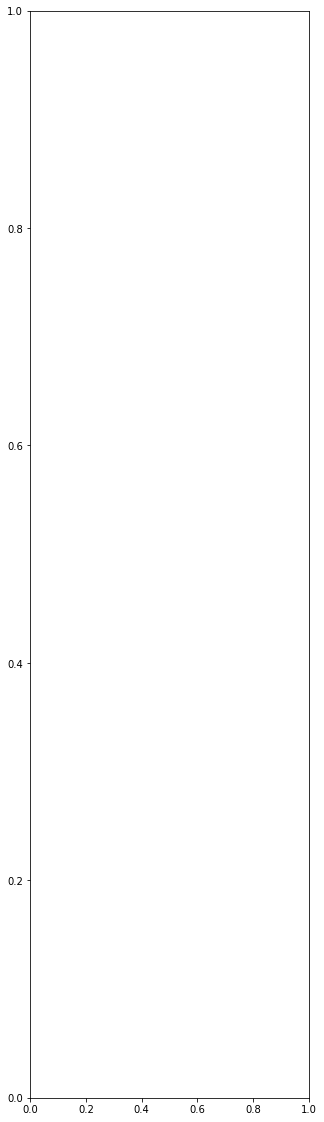

In [136]:
missing_df.plot(kind='barh',figsize=(5,20),sort_columns=True,inplace=True)

<BarContainer object of 60 artists>

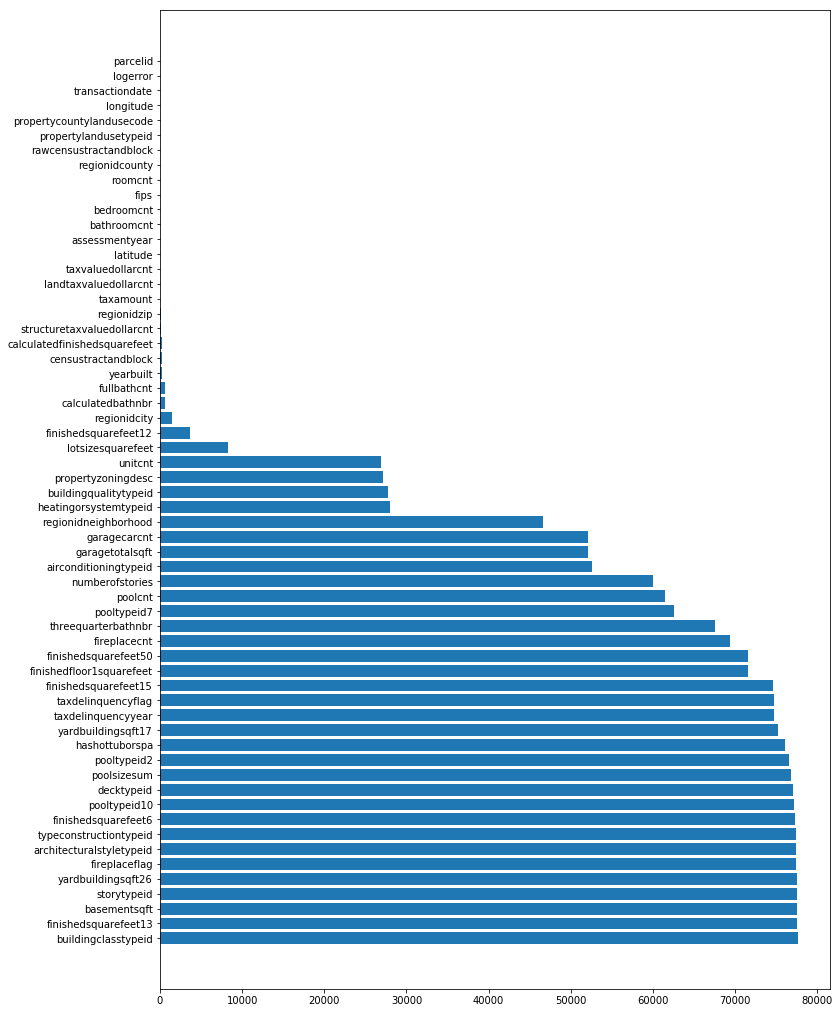

In [138]:
fig, ax = plt.subplots(figsize=(12,18))
#fig = plt.figure(figsize=(12,8))
ax.barh(missing_df.column_name,missing_df.missing_count)
ax.set_yticks

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [76]:
isNumeric = df_train.select_dtypes(include='number')


In [78]:
isNumeric.shape

(77613, 54)

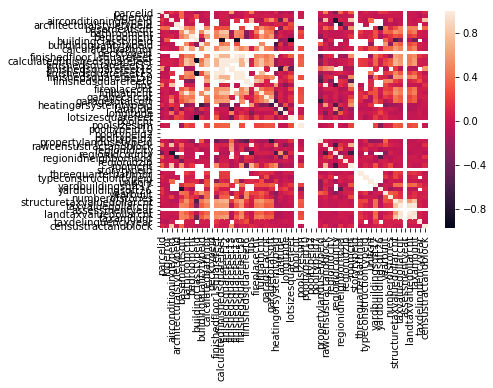

In [81]:
corr = isNumeric.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [84]:
#question::
dropcols= corr[(corr > 0.8).all(1)]

In [85]:
dropcols.head()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock


#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [89]:
#question::
df_train.loc[df_train.hashottuborspa =='NA']=None

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [ ]:
df_train.loc[df_train.pooltype.isNull]

(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [ ]:
df_train.loc[df_train.taxdeliquencyflag =='NA']

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [ ]:
df_train.loc[df_train.garagecarcnt =='NA']

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [100]:
# question
#df_train[(df_train.poolsizesum.isnull)|(df_train.poolsizesum==0)] 
df_train.poolsizesum[(df_train.poolsizesum.isnull())|(df_train.poolsizesum >0)]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
77583    NaN
77584    NaN
77585    NaN
77586    NaN
77587    NaN
77588    NaN
77589    NaN
77590    NaN
77591    NaN
77592    NaN
77593    NaN
77594    NaN
77595    NaN
77596    NaN
77597    NaN
77598    NaN
77599    NaN
77600    NaN
77601    NaN
77602    NaN
77603    NaN
77604    NaN
77605    NaN
77606    NaN
77607    NaN
77608    NaN
77609    NaN
77610    NaN
77611    NaN
77612    NaN
Name: poolsizesum, Length: 77613, dtype: object

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [ ]:
df_train.fireplacecnt

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [113]:

df_train.airconditioningtypeid[df_train.airconditioningtypeid.isnull()] ==1

0        False
1        False
2        False
3        False
5        False
7        False
8        False
9        False
11       False
12       False
14       False
15       False
18       False
19       False
21       False
22       False
23       False
25       False
26       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
36       False
37       False
39       False
40       False
         ...  
77571    False
77572    False
77575    False
77577    False
77578    False
77579    False
77580    False
77582    False
77583    False
77584    False
77585    False
77586    False
77588    False
77589    False
77590    False
77591    False
77593    False
77594    False
77595    False
77596    False
77597    False
77598    False
77600    False
77602    False
77603    False
77604    False
77607    False
77609    False
77610    False
77612    False
Name: airconditioningtypeid, Length: 52606, dtype: bool

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [ ]:
df_train.airconditioningtypeid[df_train.airconditioningtypeid.isnull()] ==1

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [114]:

df_train.dropna(subset=['airconditioningtypeid'], how='any')

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
4,10887214.0,0.00694036,2017-01-01,1,NaN,NaN,3,3,NaN,8,...,NaN,NaN,73681,119407,2016,45726,1533.89,NaN,NaN,6.03712e+13
6,12095076.0,-0.00101096,2017-01-01,1,NaN,NaN,3,4,NaN,9,...,NaN,NaN,276684,773303,2016,496619,9516.26,NaN,NaN,6.03746e+13
10,11104527.0,0.00596317,2017-01-02,1,NaN,NaN,3,4,NaN,8,...,NaN,NaN,271715,430108,2016,158393,6103.36,NaN,NaN,6.03792e+13
13,13944538.0,0.0456017,2017-01-02,13,NaN,NaN,2.5,3,NaN,NaN,...,2,NaN,96617,319668,2016,223051,4078.08,NaN,NaN,6.05909e+13
16,14375300.0,-0.021896,2017-01-02,13,NaN,NaN,2,4,NaN,NaN,...,1,NaN,169118,528847,2016,359729,5496.44,NaN,NaN,6.05905e+13
17,12045625.0,-0.0171668,2017-01-02,1,NaN,NaN,3,3,NaN,8,...,NaN,NaN,169727,259197,2016,89470,2831.48,NaN,NaN,6.0373e+13
20,12325145.0,0.0424629,2017-01-02,1,NaN,NaN,2,3,NaN,6,...,NaN,NaN,140581,178646,2016,38065,2391.69,Y,15,6.03755e+13
24,11671335.0,-0.000545672,2017-01-02,1,NaN,NaN,3,2,NaN,9,...,NaN,NaN,276641,573247,2016,296606,6964.34,NaN,NaN,6.03726e+13
27,11130689.0,0.0201102,2017-01-02,1,NaN,NaN,2,3,NaN,6,...,NaN,NaN,222238,401399,2016,179161,5438.41,NaN,NaN,6.03792e+13
35,10891778.0,-0.00252049,2017-01-02,1,NaN,NaN,3,2,NaN,7,...,NaN,NaN,173161,367967,2016,194806,4499.16,NaN,NaN,6.03712e+13


#### 11. We can also use some machine learning algorithm to fill the missing data. (you can skip this if you feel so difficult)
In this dataset, there's quite a few variables which are probably dependant on longtitude and latitude data. It is reasonable to fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information).

You don't need to understand the following code, just consider this as a function you can use directly. The following code comes from the link:
https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Works on categorical feature
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

### Example: 
### If you want to impute buildingqualitytypeid with geological information:
"""
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )
"""

## Works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return

**Find out some features you can use this knn to fill the missing data, and use the above funtion to impute them**